# Libraries

In [51]:
import numpy as np 
import os
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer # Radicalisation 
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Functions

In [52]:
def replace(text,regex,replace_with):
    tmp = re.compile(regex)
    replaced_text = tmp.sub(replace_with, text)
    return replaced_text 

In [53]:
def replace_urls(text, replace_with="httpaddr"):
    return replace(text,r"https?://\S+|www\.\S+",replace_with)
    
def replace_emails(text, replace_with="emailaddr"):
    return replace(text,r"\S+@\S+",replace_with)

def replace_numbers(text, replace_with="number"):
    return replace(text,r"\d+",replace_with)

def replace_money(text):
    return text.replace("$", " dollar").replace("€", " euro").replace("£", " pound")

def replace_phone_numbers(text, replace_with="phonenumber"):
    return replace(text,r'\+\d+',replace_with)

def remove_html_tags(text,replace_with=""):
    return replace(text,r'<.*?>',replace_with)

def word_stemming(text):
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(text)  # Tokenisation
    stemmed_words = [stemmer.stem(word) for word in words] # Radicalisation
    stemmed_text = ' '.join(stemmed_words) # Rebuild the text
    return stemmed_text

def remove_punctuation(text, replace_with=""):
    return replace(text,r'[^\w\s]',replace_with)

def remove_spaces(text, replace_with=" "):
    return replace(text,r'\s+',replace_with)

In [54]:
def normalize(data):
    if isinstance(data, str):  # handle single string input
        data = [data]
    processed_data = []
    for string in data:
        string = string.lower()
        string = replace_urls(string)
        string = replace_emails(string)
        string = replace_numbers(string)
        string = replace_money(string)
        string = replace_phone_numbers(string)
        string = remove_html_tags(string)
        string = word_stemming(string)
        string = remove_punctuation(string)
        string = remove_spaces(string)
        processed_data.append(string)

    if isinstance(data, str):  # handle single string input
        return processed_data[0]
    else:                      # handle iterable input
        return processed_data


# Test with An Email 


In [55]:
email_test_path = "email_test.txt"
email =  open(email_test_path, "r").read()

# Before (Pre-processing)

In [56]:
print(email)

> Anyone knows how much it costs to host a web portal ?

>

Well, it depends on how many visitors youre expecting. This can be
anywhere from less than 10 bucks a month to a couple of $100. You
should checkout http://www.rackspace.com/ or perhaps Amazon EC2 if
youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com


After (Pre-processing)

In [57]:
print(normalize(email))

[' anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr']


# Load files (emails)

In [58]:
directories = {
    "easy_ham_dir" : "./data/easy_ham/",
    "hard_ham_dir" : "./data/hard_ham/",
    "spam_2_dir"   : "./data/spam_2/"
}

files_names = {}

# For each directory, load the file names and add them to the dictionary
for key, path in directories.items():
    files_names[key] = os.listdir(path)

# Load the contents of each file in each directory into a NumPy array
contents = {}
for key, path in directories.items():
    contents[key] = np.array([open(path + file_name, "r", encoding="latin-1").read() for file_name in files_names[key]])


In [59]:
print(contents["easy_ham_dir"][0]) 

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@example.com>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.example.com (listman.example.com [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@example.com>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.example.com
Received: from int-mx1.corp.example.com (int-mx1.corp.example.com
    [172.16.52.254]) by lis

# Data pre-processing


In [60]:
normalized_content =  {}
# Normalize the contents of each file (all 3 directories are stored in contents)
for key, content in contents.items():
    normalized_content[key] = normalize(content)

In [61]:
print(normalized_content["easy_ham_dir"][0]) # Print the first email of the spam_2_dir directory after normalization

from emailaddr thu aug number number number number number returnpath emailaddr deliveredto emailaddr receiv from localhost localhost numbernumbernumbernumb by phoboslabsnetnoteinccom postfix with esmtp id dnumberenumbercnumb for emailaddr thu number aug number number number number number edt receiv from phobo numbernumbernumbernumb by localhost with imap fetchmailnumbernumbernumb for emailaddr singledrop thu number aug number number number number number ist receiv from listmanexamplecom listmanexamplecom numbernumbernumbernumb by dogmaslashnullorg numbernumbernumbernumbernumbernumb with esmtp id gnumbermbyrznumb for emailaddr thu number aug number number number number number receiv from listmanexamplecom localhostlocaldomain numbernumbernumbernumb by listmanredhatcom postfix with esmtp id number thu number aug number number number number number edt deliveredto emailaddr receiv from intmxnumbercorpexamplecom intmxnumbercorpexamplecom numbernumbernumbernumb by listmanredhatcom postfix wi

# Vocabulaire


In [62]:
def build_vocab(spam_dir, k=10):
    # Initialisation du compteur de mots
    word_counter = Counter()

    # Parcours des e-mails dans le répertoire
    for content in normalized_content[spam_dir]:
        # Tokenisation du contenu de l'e-mail en mots
        words = nltk.word_tokenize(content)

        # Mise à jour du compteur de mots
        word_counter.update(words)

    vocab_words = []
    for word, count in word_counter.items():
        if count >= k:
            vocab_words.append(word)

    # Sauvegarde de la liste de vocabulaire dans un fichier
    with open("vocab.txt", "w") as f:
        for word in vocab_words:
            f.write(word + "\n")

In [63]:
build_vocab("spam_2_dir", k=10)

In [64]:
def map_words_to_indices(words, vocab):
    indices = []
    for word in words:
        if word in vocab:
            indices.append(vocab.index(word))
    return indices

In [65]:
def load_vocab():
    with open('vocab.txt', 'r') as f:
        vocab_words = [line.strip() for line in f]
    return vocab_words

In [66]:
for key, content in normalized_content.items():
    print(key)
    list_indices = []
    for email in content:
        words = nltk.word_tokenize(email)
        vocab = load_vocab()
        list_indices.append(map_words_to_indices(words, vocab))
print(list_indices[0])

easy_ham_dir
hard_ham_dir
spam_2_dir
[0, 1, 2, 3, 4, 4, 4, 4, 4, 5, 1, 6, 1, 7, 0, 8, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 4, 3, 4, 4, 4, 4, 4, 17, 7, 0, 18, 9, 10, 8, 13, 19, 20, 16, 1, 21, 2, 4, 3, 4, 4, 4, 4, 4, 22, 7, 0, 23, 1, 9, 10, 24, 25, 13, 14, 15, 16, 1, 26, 4, 3, 4, 4, 4, 4, 4, 7, 0, 27, 1, 9, 10, 23, 25, 13, 14, 15, 28, 26, 4, 3, 4, 4, 4, 4, 4, 7, 0, 9, 10, 23, 25, 13, 14, 15, 28, 16, 1, 26, 4, 3, 4, 4, 4, 4, 4, 29, 23, 30, 9, 31, 32, 33, 7, 0, 9, 9, 10, 34, 35, 15, 26, 4, 3, 4, 4, 4, 4, 4, 36, 1, 37, 26, 4, 3, 4, 4, 4, 4, 4, 32, 1, 0, 38, 39, 1, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 1, 54, 1, 55, 41, 56, 57, 58, 59, 60, 61, 62, 63, 1, 64, 65, 66, 7, 67, 68, 69, 65, 70, 71, 72, 73, 74, 7, 75, 76, 77, 78, 79, 80, 67, 81, 82, 83, 84, 85, 86, 87, 88, 67, 81, 89, 90, 91, 92, 93, 94, 81, 95, 80, 65, 96, 97, 98, 99, 10, 100, 101, 51, 82, 83, 102, 67, 68, 103, 104, 33, 50, 86, 105, 106, 107, 108, 109, 110, 74, 111, 112, 100, 101, 81, 89, 113, 114, 16, 86, 115

# Extract Features :

In [67]:
def extract_features(emails, vocab, representation='binary'):
    n_emails = len(emails)
    n_vocab = len(vocab)
    features = np.zeros((n_emails, n_vocab))
    for i, email in enumerate(emails):
        words = nltk.word_tokenize(email)
        if representation == 'binary':
            for j, word in enumerate(vocab):
                if word in words:
                    features[i, j] = 1
        elif representation == 'count':
            word_counts = Counter(words)
            for j, word in enumerate(vocab):
                features[i, j] = word_counts[word]
    return features

In [68]:
# Load vocabulary
vocab_list = load_vocab()

# Extract features from normalized content with binary representation for each directory
binary_features = {}
for key, content in normalized_content.items():
    binary_features[key] = extract_features(content, vocab_list, representation='binary')

# Extract features from normalized content with count representation for each directory
count_features = {}
for key, content in normalized_content.items():
    count_features[key] = extract_features(content, vocab_list, representation='count')


In [69]:
binary_features_vector = np.concatenate((binary_features["easy_ham_dir"], binary_features["hard_ham_dir"], binary_features["spam_2_dir"]))
count_features_vector = np.concatenate((count_features["easy_ham_dir"], count_features["hard_ham_dir"], count_features["spam_2_dir"]))

# **Classification**


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier

In [85]:
# split data into training and testing sets
path = "./data/easy_ham/"
ham_emails = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
path = "./data/hard_ham/"
ham_emails += len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
path = "./data/spam_2/"
spam_emails = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])

In [86]:
X = binary_features_vector 
y = np.array([0] * ham_emails + [1] * spam_emails) 
print(X.shape , y.shape)

(4197, 3853) (4197,)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [88]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for logistic regression : {accuracy}')

Accuracy for logistic regression : 0.9904761904761905


In [89]:
with open('email_test.txt', 'r') as file:
    email_text = file.read()

preprocessed_email = normalize(email_text)
# turn it into a dictionary
email = {'text': preprocessed_email}

email_features = extract_features(email, vocab_list, representation='binary')

prediction = model.predict(email_features)

if prediction == 1:
    print('The email is predicted as spam.')
else:
    print('The email is predicted as ham.')

The email is predicted as ham.


## confusion matrics 

In [90]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion sur l'ensemble de test
confusion = confusion_matrix(y_test, y_pred)
print('Matrice de confusion du modele regression logistique :')
print(confusion)



Matrice de confusion du modele regression logistique :
[[586   7]
 [  1 246]]


## ROC Curve

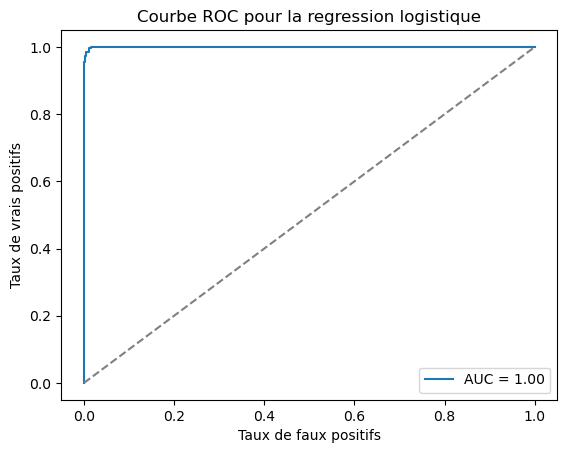

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculer la probabilité de prédiction pour chaque exemple dans l'ensemble de test
y_prob = model.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs, les taux de vrais positifs et les seuils à différents points de décision
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer la surface sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour la regression logistique')
plt.legend()
plt.show()


## KNN: 

In [92]:
model = KNeighborsClassifier(5)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy for KNN is {accuracy}')

The accuracy for KNN is 0.9619047619047619


## confusion Matrics

In [93]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print('Matrice de confusion du modele KNN:')
print(conf_mat)


Matrice de confusion du modele KNN:
[[585   8]
 [ 24 223]]


## ROC Curve

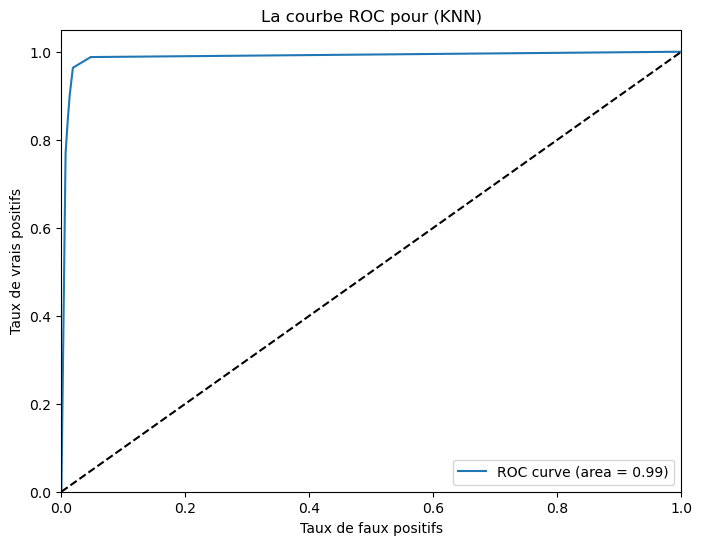

In [94]:
y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('La courbe ROC pour (KNN)')
plt.legend(loc="lower right")
plt.show()


## Decision Tree

In [95]:
clf = DecisionTreeClassifier(max_depth= 5 , random_state= 42)

clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy for decsion tree is : {accuracy}')

The accuracy for decsion tree is : 0.9607142857142857


## Confusion Matrics

In [96]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion du modele Arbre de decision :\n", cm)

Matrice de confusion du modele Arbre de decision :
 [[577  16]
 [ 17 230]]


## ROC Curve

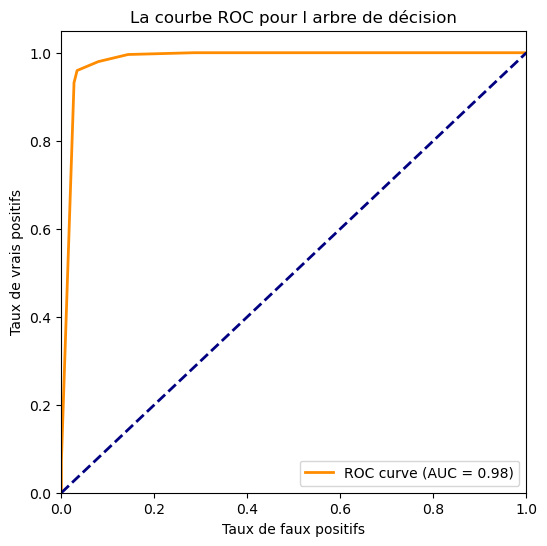

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

probas = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('La courbe ROC pour l arbre de décision')
plt.legend(loc="lower right")
plt.show()
